# NYPD Complaint Time Open Prediction Model

#### Contributors: Shasank Bonthala, Viswesh Uppalapati

# Summary of Findings


### Introduction

We are ultimatly trying to see if demographic information about the complainent (such as age, gender, ethnicity) along with information about the officer (such as age, gender, ethnicity) can be used to accurately preduct the length that each complaint case remains open for the NYPD complaints dataset. This problem is a regression because we are trying to produce predictions of lengths (in months). The target variable is the time in months that each case is open. We think this is extremely important because it can show that certain variables that shouldn't have an affect on this metric actually end up affecting the length of each case (such as race, age, gender). Our evaluation metric is root mean squared error (RMSE) and with a regression model, we feel that this would be the best evaluation metric to compare against our features. We will also look at the R^2 score for each model but given that we don't have too much experience in feature modeling, all the R^2 scores will be pretty low (they can still be a good indicator of growth however).


#### Cleaning

Cleaning the nypd complaints dataset involved many different steps, each of which cut down or transformed the dataset to be relevant to our prediction problem. These steps, in order, included:

- First, we loaded the dataset 'allegations.csv' into a Pandas dataframe called complaints.
- There are over 25 columns in the original complaints dataset, therefore, we kept the columns only relevant to the question we posed. These include: 'unique_mos_id', 'complaint_id', 'month_received', 'year_received', 'month_closed', 'year_closed', 'mos_ethnicity', 'mos_gender', 'mos_age_incident', 'complainant_ethnicity', 'complainant_gender', 'complainant_age_incident', 'fado_type', 'allegation', 'precinct', and, 'board_disposition'.
- The date of reception and closure of each complaint was given in four separate columns in the original dataset, therefore, we combined them and took the difference between them in order to calculate the time each case is open. We dropped the original date columns and added the column of the time each case was open for. This will allow us to predict the time open and check the accuracy of our prediction based on the other variables.
- Some of the columns in the dataset were known to contain "Unknown" values, so we looked at every column of our modified dataset and found that only the 'complainant ethnicity' had 'Unkown" values. We changed these "Unkown" values to np.NaNs.
- The original dataset has inconsistencies in how the gender of the officer reported and that of the complainant were recorded in the dataset, so, the gender of the officers were changed to have to same format as that of the complainant. This will allow for consistent syntax and labels through our analysis.
- Next, we see that the 'board_disposition' column has three main decisions: Substantiated, Unsubstantiated, and Exonerated. The 'Substantiated' decision, however, has multiple sub-categories. For easier representation during prediction, we removed the sub-categories and kept only the main decision info.
- Lastly, the 'complainant_age_incident' column had some values for ages that were 0.0 and under. This indicates a recording error as there can't be people of ages 0 and under that are reporting a complaint against nypd. Therefore, we changed these values to np.NaN as they are likely missing values. We assumed any age above 0 to be a valid recording of the age eventhough that might not be the case. Again, this will help us with proper representation and analysis of the data as it relates to our question.
- Lastly, we proceeded to impute the each column with missing data by sampling from the distribution of that column. This ensures that there are no np.NaN values in our columns that will result in errors in our regression.


### Baseline Model

The final number of columns we used in our baseline predicton model was 7. Descriptions of them and why we felt they are important are as follows:
- **mos_ethnicity**: The ethnicity of the officer. We felt this was important because officers with certain ethnicities may have an impact on the length that the case remains open.
- **mos_gender**: The gender of the officer. Similar too mos_ethnicity, we felt this could play a key role in predicting the length of a case. 
- **mos_age_incident**: The age of the officer. Similar to both of the columns above, we felt this could play a key role in predicting the length of a case.
- **complainant_ethnicity**: The ethnicity of the complainant. Based on our project 3, ethnicity was statistically proven to be discriminated against (by our hypothesis test) so it plays a key role. 
- **complainant_gender**: The gender of the complainant. Like complainant ethnicity, our project 3 lead us to believe that gender could play a key role in predicting the length of a case.
- **complainant_age_incident**: The age of the complainant. Similar to the previous two above, based on project 3 results, we belive this plays a key role in the prediction.
- **fado_type**: Category of the complaint. This definitely would play a role in how long the cases stay open.

We ended up dropping the following columns from our baseline model for the following reasons:
- **time_open (in months)**: This is the y in our prediction model so it was dropped in the X table and stored as the y.
- **unique_mos_id**: The unique ID of each officer. We decided to drop this because there wasn't really a way to encode this (too many values for one hot encoding and no order to ordinally encode)
- **complaint_id**: The unique ID of each complaint. Similar to the unique_mos_id, there wasn't really a natural way to encode this column so we decided to drop it.
- **precinct**: The precinct of the officer that is being complained against. Also very similarly, there wasn't a way to naturally order the precincts
- **board_disposition**: The decision by the board. We dropped this column because realistically at the time of the prediction, we wouldn't have access to this decision.

In total we had 2 quantitative features (mos_age_incident & complainant_age_incident) and 5 nominal features (mos_ethnicity, mos_gender, complainant_ethnicity, complainant_gender, fado_type). With the baseline model, the RMSE that we got after we rounded the predictions (because our values in the data set were ints) was 4.78 months. We think that this model is a pretty bad model because having an average error of around 5 months on a prediction for how long a case remains open is pretty bad. Especially since the majority of the cases don't stay open past 12 months (unless in extreme cases) but we did use a linear regression model with no feature engineering so we expected the RMSE to be quite bad.


### Final Model

For our final model, we ended up using the same columns to predict that were used in our baseline model (as mentioned above). To start with feature engineering, we created a new transformer called StdScalerByGroup(). This transformer takes in a dataframe with a categorical column at column index 0 and transforms the rest of the quantitative data in that dataframe by standardizing by the group. To do so, the transformer z-scales the values based on the mean and standard deviation of each group. In our final model, we standardized ‘complainant _age_incident’ based on the ‘complainant_ethnicity’ and we standardized ‘mos_age_incident’ by the ‘precinct’ that each complaint was associated with. Next, we created a function that binarized the ethnicity columns. It assigned the value of 1 to ‘White’ ethnicities and 0 to the rest. We used this to transform ‘mos_ethnicity’ and ‘complainant_ethnicity’. Lastly, we kept the one-hot encoding on ‘mos_gender’, ‘complainant_gender’, and ‘fado_type’ from our baseline model and dropped the rest of the columns. The above transformations were all combined into a single ColumnTransformer that was accessed throughout the rest of the project.

Using the ColumnTransformer that was built after feature engineering, we used GridSearchCV on different regression models to find the best predicting parameters for each of the regressors. We tested this on RandomForestRegressor, DecisionTreeRegressor, and KNeighborsRegressor. Each was passed into the GS_Model() method along with a test set of parameters and the ColumnTransformer that was built above. Using these, the method runs and fits a GridSearch algorithm to the training data. The mean test scores (R^2) values for each regressor were plotted as a histogram. The graphs indicated that RandomForestRegressor() with parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2} seemed to
have the best overall performance on the train dataset, while the other two regressors had test scores that were mostly zero and under. Upon conclusion of the GridSearchCV algorithm for each of the regressors, we had the best set of parameters for each of the regressors that were used to build a model.

Finally, the best parameters for each of the models were once again used for a final evaluation to test the model performance on the test dataset. Using the calc_model() method that calculated the performance of the passed in model on the test dataset using measures such as R^2 and RMSE, each regressor was tested one final time on the test set to compare the evaluation metrics. In addition to the regressors used in GridSearch, we also built another LinearRegression model to compare to the baseline LinearRegression model. Based on the results, RandomForestRegression seemed to work the best at predicting on the test set. For the baseline model, R^2 on the test set is 0.0132 and RMSE was 5.0632, while the model built on the ColumnTransformer and RandomForestRegressor() with the best parameters had an R^2 of 0.268 and RMSE of 4.365. All the other regression models had an R^2 that was significantly lower than the RandomForestRegressor model and an RMSE that was close to that of the baseline model indicating that the other models did not predict the average time open of each case accurately. Since the performance of the RandomForestRegressor model improved significantly on the baseline model, we chose that as our final model. 


### Fairness Evaluation

For our measure of fairness, we thought it would be interesting to look at the complainaint ethnicities and break that column into white vs non-white sub groups. Looking at whether or not our model would accurately predict one group vs the other seemed to be of interest to us. First of all to justify the parity measure used for our fairness test, we felt that the best option to use was the absolute difference between root mean squared errors for the white complainant ethnicity sub group and the non-white complainant ethnicity sub group. The reason we used the difference between RMSE errors is because our model is a regression model so using measures like precision and accuracy don't really apply. The best measure of fairness, we determined, was the RMSE scores over the R^2 scores because we felt it would apply more to the length of the each case being opened. RMSE is a metric that determines on average how close our predictions to the real time open actually were for each sub group. So using the difference of this metric ends up being the best choice when deciding if the model ended up fairly predicting each sub group the same. We ran a permutation test with 500 iterations with the followinig null and alternative hypothesis' along wth the test statistic:

**Null Hypothesis**: my model is fair; the RMSE for my two subsets (white vs non-white) are roughly the same

**Alternative Hypothesis**: my model is unfair; the RMSE for the non-white subset is higher than the white subset

**Test Statistic**: Absolute Difference in RMSE values for white subset and non-white subset

Based on the permutation test we ran, with an observed asbolute RMSE difference of 0.380 for the two different sub groups, the p-value we ended up with was 0.488. Because of this we end up failing to reject the null hypothesis and end up favoring it in that our model is fair and the RMSEs of the two subsets of ethnicities (white vs non-white) are roughly the same. This is ideal because it means that our model can be used without concern of bias if we are predicting white vs non-white ethnicities.

# Code

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

##### Data Cleaning

In [267]:
complaints = pd.read_csv('allegations.csv')
complaints

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


In [268]:
# Here, we are only selecting the columns in complaints that are relevant to our question and analysis

keep_cols = ['unique_mos_id', 'complaint_id', 'month_received', 'year_received', 'month_closed', 
             'year_closed', 'mos_ethnicity', 'mos_gender', 'mos_age_incident', 'complainant_ethnicity', 
             'complainant_gender', 'complainant_age_incident', 'fado_type', 'allegation', 'precinct', 'board_disposition']
complaints = complaints[keep_cols]

In [269]:
# Here, we are calculting the time that the case has been open for each complaint. We do so by combining the corresponding
# month and years and changing the combined date to a datetime object. Then, we find the difference between the received
# and closed dates in months and add it as a new column to the complaints dataframe called 'time open (in months)'. Lastly,
# all the other date columns are dropped as they are no longer relevant to our analysis.

def timechanger1(row):
    return str(row['month_received']) + '/' + str(row['year_received'])

def timechanger2(row):
    return str(row['month_closed']) + '/' + str(row['year_closed'])

def diff_month(dates):
    return (dates[1].year - dates[0].year) * 12 + dates[1].month - dates[0].month

date1 = pd.to_datetime(complaints.apply(timechanger1, axis = 1))
date2 = pd.to_datetime(complaints.apply(timechanger2, axis = 1))

temp = pd.DataFrame([date1, date2]).T
time_diff = temp.apply(diff_month, axis = 1)

complaints = complaints.assign(**{'time_open (in months)' : time_diff})
complaints = complaints.drop(['month_received', 'year_received', 'month_closed', 'year_closed'], axis = 1)

In [270]:
# Here, we look for the columns in our modified dataset to see which of the values are Unkown, as some of the missing
# values in the dataset were stored as 'Unknown'. Using a for loop and printing the count of unkowns in each column
# showed which of the columns need to be processed in order to change the 'Unknowns' to np.NaN and only the
# complainant_ethnicity column seemed to have values that are unkown, therefore that column was processed.

def change_unknown_to_nan(x):
    if x == 'Unknown':
        return np.NaN
    else:
        return x

complaints['complainant_ethnicity'] = complaints['complainant_ethnicity'].apply(change_unknown_to_nan)

In [271]:
# Here, we change the mos_gender values to look like complainant_gender values so that graphs and analyses can have
# consistent syntax and formatting.

def process_gender(gender):
    if gender == 'M':
        return 'Male'
    elif gender == 'F':
        return 'Female'
    else:
        return gender

complaints['mos_gender'] = complaints['mos_gender'].apply(process_gender)

In [272]:
# Here, we clean the board_disposition or the decision of the board on the case to include: substantiated, unsubstantiated,
# and exonerated as the only main decisions to simplify some aggregate visualizations.

def change_disposition(x):
    if 'Substantiated' in x:
        return 'Substantiated'
    else:
        return x

complaints['board_disposition'] = complaints['board_disposition'].apply(change_disposition)

In [273]:
# change the ages of the complainants that are zero or less to nan's as it is likely an error in data collection
complaints['complainant_age_incident'] = complaints['complainant_age_incident'].apply(lambda x : np.NaN if x <= 0.0 else x)

In [274]:
# Drops the allegation column as it is not relevant to the Ml Regression model
complaints = complaints.drop('allegation', axis = 1)

In [275]:
# Dropping the rows where the Precinct is null as there are very few rows to have an impact on the analysis.
complaints = complaints.drop(complaints[complaints['precinct'].isna()].index)

In [276]:
# this helper function takes in the dataframe and a column to impute and imputes the missing values
# based on sampling from the non-nan values in the distribution. we felt this was the most effective way 
# to fill in our nan values so that they would not interfere with the model

def impute(col, comps):
    num = comps[col].isna().sum()
    sample = comps[col].dropna().sample(num, replace = True)
    sample.index = comps[comps[col].isna()].index
    complaints = comps.fillna({col : sample.to_dict()})
    return complaints

eth_impute = impute('complainant_ethnicity', complaints)
gen_impute = impute('complainant_gender', eth_impute)
age_impute = impute('complainant_age_incident', gen_impute)

In [277]:
# Here, by the time age_impute is calculated, the entire dataset is properly imputed, therefore, we are doing a deep
# copy of the age_impute dataset into complaints as it is the final cleaned dataset for the regression.
complaints = age_impute.copy()

In [278]:
complaints.isna().mean()

unique_mos_id               0.0
complaint_id                0.0
mos_ethnicity               0.0
mos_gender                  0.0
mos_age_incident            0.0
complainant_ethnicity       0.0
complainant_gender          0.0
complainant_age_incident    0.0
fado_type                   0.0
precinct                    0.0
board_disposition           0.0
time_open (in months)       0.0
dtype: float64

In [279]:
complaints.head()

,unique_mos_id,complaint_id,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,precinct,board_disposition,time_open (in months)
0,10004,42835,Hispanic,Male,32,Black,Female,38.0,Abuse of Authority,78.0,Substantiated,10
1,10007,24601,White,Male,24,Black,Male,26.0,Discourtesy,67.0,Substantiated,9
2,10007,24601,White,Male,24,Black,Male,26.0,Offensive Language,67.0,Substantiated,9
3,10007,26146,White,Male,25,Black,Male,45.0,Abuse of Authority,67.0,Substantiated,14
4,10009,40253,Hispanic,Female,39,Black,Male,16.0,Force,67.0,Substantiated,6


### Baseline Model

In [280]:
# Splits our complaints data set with a test size of 20%, sets up X and y datasets that will be used throughout the project.

X = complaints.drop('time_open (in months)', axis = 1)
y = complaints['time_open (in months)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [281]:
# Here, we build the baseline model to predict the time open of each case by using a basic LinearRegression().

def helper(col):
    return col

# Pipeline that passes the columns as is into the final regression
pass_cols = ['mos_age_incident', 'complainant_age_incident']
no_transformer = Pipeline(steps = [('nothing', FunctionTransformer(helper))])

# Pipeline that one hot encodes nomial columns that are passed in
one_hot_cols = ['mos_ethnicity', 'mos_gender', 'complainant_ethnicity', 'complainant_gender', 
                'fado_type']
one_hot = Pipeline(steps = [('one-hot', OneHotEncoder())])

# ColumnTransformer that combines the above pipelines into a single transformer
preproc_baseline = ColumnTransformer(transformers = [('as-is', no_transformer, pass_cols), 
                            ('cat', one_hot, one_hot_cols)], remainder = 'drop')

# Final baseline model pipeline that is used to predict the time open in months
pipe = Pipeline(steps = [('preprocessor', preproc_baseline), ('lin-reg', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('as-is',
                                                  Pipeline(steps=[('nothing',
                                                                   FunctionTransformer(func=<function helper at 0x00000190B34C8B80>))]),
                                                  ['mos_age_incident',
                                                   'complainant_age_incident']),
                                                 ('cat',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder())]),
                                                  ['mos_ethnicity',
                                                   'mos_gender',
                                                   'complainant_ethnicity',
                                                   'complainant_gender',
                                     

In [282]:
# Here, the RMSE and R^2 of the model on the test dataset are calculated and displayed.

preds = np.round(pipe.predict(X_test))
rmse = np.sqrt(np.mean((preds - y_test)**2))
print('R^2: ' + str(pipe.score(X_test, y_test)))
print('RMSE: ' + str(rmse))

R^2: 0.013198549998511
RMSE: 5.063197428660068


### Final Model

##### Feature Engineering and Building Initial Pipeline

In [283]:
# Here, we built a transformer that takes in a dataframe with the first column signifying a group column. This transformer
# then standardizes the data in each group by z-scoring it.

from sklearn.base import BaseEstimator, TransformerMixin


class StdScalerByGroup(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        
        # Converts X to a dataframe
        df = pd.DataFrame(X)
        
        # Groups by the first column and calculates the mean and std of each group
        vals = df.groupby(df.iloc[:, 0]).aggregate([np.mean, np.std])

        # Stores the dict of means and stds in a dictionary within an attribute of the transformer
        self.grps_ = vals.to_dict()

        return self

    def transform(self, X, y=None):
        
        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")
        

        # Helper function that z-scores each colum using the dictionary stored
        def helper(df):
            group = df.iloc[:, 0].unique()[0]
            df = df.drop(df.columns[0], axis = 1)
            
            for x in df.columns:
                df[x] = (df[x] - self.grps_[(x, 'mean')][group]) / self.grps_[(x, 'std')][group]
                
            return df

        df = pd.DataFrame(X)
    
        # transforms the dataframe using the helper and returns it
        return df.groupby(df.iloc[:, 0]).apply(helper)

In [284]:
# Binarize function that takes in ethnicity columns and binarizes White to be 1 and all non-White ethnicities to be 0.

def Binarize(df):
    def applier(ethnicity):
        if ethnicity == 'White':
            return 1
        else:
            return 0
    
    for col in df.columns:
        df[col] = df[col].apply(applier)
    return df

In [285]:
# Here, we build the preprocessor that performs all the transformations on the different columns of the training data.

# Pipeline that standardizes complainant age based on the ethnicity of the complainant
comp_cols = ['complainant_ethnicity', 'complainant_age_incident']
scale_complainant = Pipeline(steps = [('std_scale_complainant', StdScalerByGroup())])

# Pipeline that standardizes mos (police officer) age based on the precinct that the complaint was associated with.
mos_cols = ['precinct', 'mos_age_incident']
scale_mos = Pipeline(steps = [('std_scale_mos', StdScalerByGroup())])

# Pipline that binarizes the ethnicities of the complainant and police officer
binary_cols = ['complainant_ethnicity', 'mos_ethnicity']
binarize = Pipeline(steps = [('binarizer', FunctionTransformer(Binarize, validate = False))])

# Pipeline that one-hot encodes all the other nominal columns
cat_cols = ['mos_gender', 'complainant_gender', 'fado_type']
one_hot = Pipeline(steps = [('one-hot', OneHotEncoder())])

# ColumnTransformer or preprocessor that combines all the above pipelines into one transformer
preproc = ColumnTransformer(transformers = [('standardize_complainant', scale_complainant, comp_cols), 
                            ('standardize_mos', scale_mos, mos_cols), ('Binarize', binarize, binary_cols),
                            ('cat', one_hot, cat_cols)], remainder = 'drop')

##### Evaluating Different Regression Models Using GridSearchCV

In [180]:
# Method that runs a gridsearch cross validation to find the best parameters for the model that is being evaluated.

def GS_model(regressor, preprocessor, comps_data, parameters):
    
    X = complaints.drop('time_open (in months)', axis = 1)
    y = complaints['time_open (in months)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # build the pipeline using the preprocessor and the regressor that was passed in
    pipe = Pipeline(steps = [('preprocessor', preprocessor), ('reg', regressor)])
    
    # transform the train data that is passed into the GridSearch using the preprocessor
    preprocessed = pipe['preprocessor'].fit_transform(X_train)
    
    # Define the GridSearch and fit the train dataset
    clf = GridSearchCV(pipe['reg'], parameters, cv=3)
    clf.fit(preprocessed, y_train)
    
    # Return the completed GridSearch
    return clf

In [182]:
# Evaluation of best model for a RandomForestRegressor().

# Parameters to test
parameters = {
    'max_depth': [None,2,5,7,10,15,20], 
    'min_samples_split':[2,7,15],
    'min_samples_leaf':[1,2,7,15]
}

# Run the gird search on RandomForestRegressor() by calling GS_model() and display the best parameters for the model
forest_GC = GS_model(RandomForestRegressor(), preproc, complaints, parameters)
forest_GC.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Text(0.5, 0.98, 'Accuracies on tain set for RandomForestRegressor')

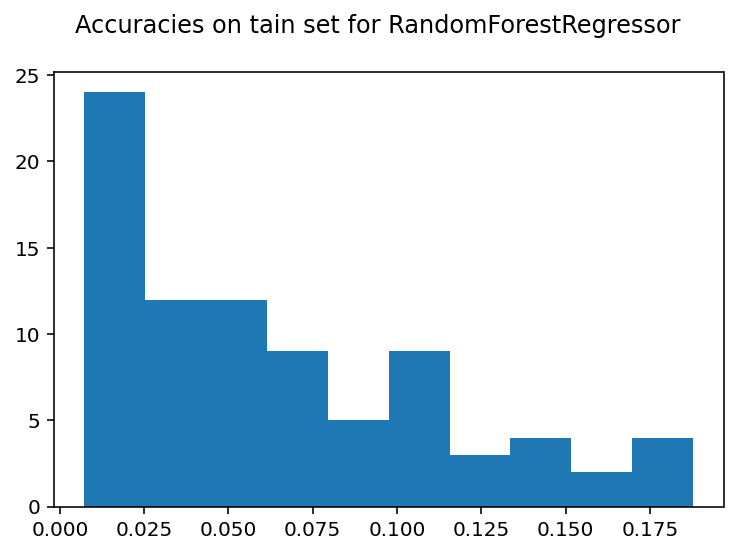

In [183]:
# Plot the distribution of model test scores (R^2) as a histogram to see the performance of all parameters of the model.
plt.hist(forest_GC.cv_results_['mean_test_score'])
plt.suptitle('Accuracies on tain set for RandomForestRegressor')

In [184]:
# Evaluation of best model for a DecisionTreeRegressor().

# Parameters to test
parameters = {
    'max_depth': [None,1,3,5,7,10,15,20], 
    'min_samples_split':[2,3,5,7,10,15,20],
    'min_samples_leaf':[2,3,5,7,10,15,20]
}

# Run the gird search on DecisionTreeRegressor() by calling GS_model() and display the best parameters for the model
decision_GC = GS_model(DecisionTreeRegressor(), preproc, complaints, parameters)
decision_GC.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15}

Text(0.5, 0.98, 'Accuracies on tain set for DecisionTreeRegressor')

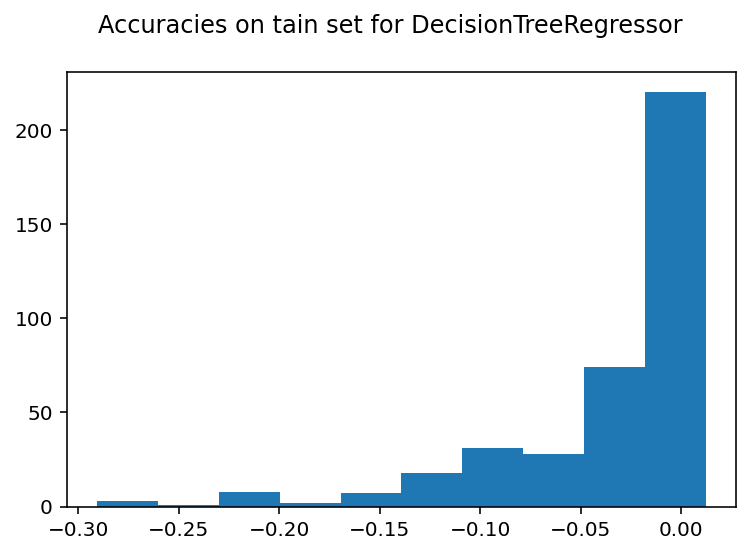

In [185]:
# Plot the distribution of model test scores (R^2) as a histogram to see the performance of all parameters of the model.
plt.hist(decision_GC.cv_results_['mean_test_score'])
plt.suptitle('Accuracies on tain set for DecisionTreeRegressor')

In [186]:
# Evaluation of best model for a KNeighborsRegressor().

# Parameters to test
parameters = {
    'n_neighbors': [2,4,6,8,10,13,15,18,20], 
    'leaf_size':[10,30,50,100,200,300,500,1000]
}

# Run the gird search on KNeighborsRegressor() by calling GS_model() and display the best parameters for the model
Kneighbors_GC = GS_model(KNeighborsRegressor(), preproc, complaints, parameters)
Kneighbors_GC.best_params_

{'leaf_size': 300, 'n_neighbors': 20}

Text(0.5, 0.98, 'Accuracies on tain set for KNeighborsRegressor')

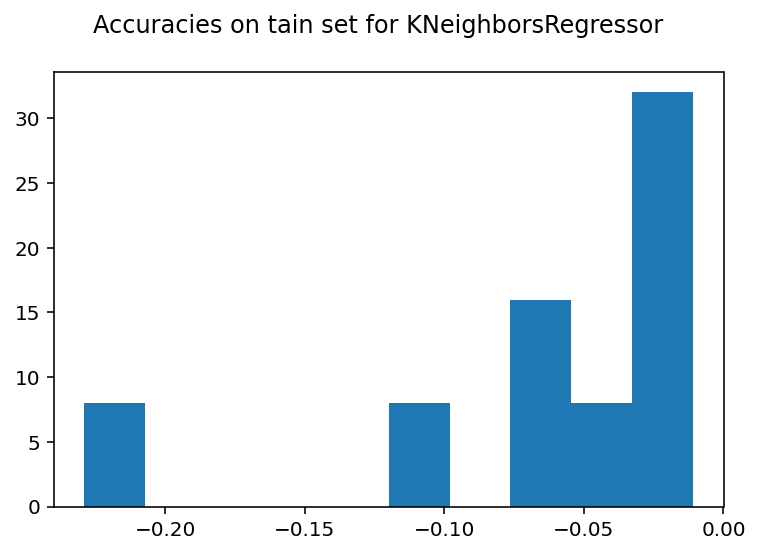

In [187]:
# Plot the distribution of model test scores (R^2) as a histogram to see the performance of all parameters of the model.
plt.hist(Kneighbors_GC.cv_results_['mean_test_score'])
plt.suptitle('Accuracies on tain set for KNeighborsRegressor')

#### Choosing Final Model Based on Evaluation

In [286]:
# Method that calculates the RMSE and R^2 for the model that is passed in.

def calc_model(regressor, preprocessor, X_train, X_test, y_train, y_test):
    
    # Build the Pipeline using the preprocessor and regressor that is passed and fit the training data to the model
    pipe = Pipeline(steps = [('preprocessor', preprocessor), ('reg', regressor)])
    pipe.fit(X_train, y_train)
    
    # Calculate the RMSE and R^2 values
    r_squared = pipe.score(X_test, y_test)
    preds = np.round(pipe.predict(X_test))
    rmse = np.sqrt(np.mean((preds - y_test)**2))
    
    # return the results
    return r_squared, rmse

In [287]:
# Calculation of RMSE and R^2 for the best parameter set returned by GridSearch of RandomForestRegressor().

best_forest = calc_model(RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2),
                         preproc, X_train, X_test, y_train, y_test)
print('R^2: ' + str(best_forest[0]))
print('RMSE: ' + str(best_forest[1]))

R^2: 0.2680052273076413
RMSE: 4.365432069124715


In [288]:
# Calculation of RMSE and R^2 for the best parameter set returned by GridSearch of DecisionTreeRegressor().

best_decision = calc_model(DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 5, min_samples_split = 15),
                         preproc, X_train, X_test, y_train, y_test)
print('R^2: ' + str(best_decision[0]))
print('RMSE: ' + str(best_decision[1]))

R^2: 0.011171450577356024
RMSE: 5.066958288429575


In [289]:
# Calculation of RMSE and R^2 for the best parameter set returned by GridSearch of KNeighborsRegressor().

best_Kneighbors = calc_model(KNeighborsRegressor(leaf_size = 300, n_neighbors = 20),
                         preproc, X_train, X_test, y_train, y_test)
print('R^2: ' + str(best_Kneighbors[0]))
print('RMSE: ' + str(best_Kneighbors[1]))

R^2: 0.005694025156449456
RMSE: 5.084408268385616


In [290]:
# Calculation of RMSE and R^2 for the best parameter set returned by GridSearch of LinearRegression().

best_Linear = calc_model(LinearRegression(), preproc, X_train, X_test, y_train, y_test)
print('R^2: ' + str(best_Linear[0]))
print('RMSE: ' + str(best_Linear[1]))

R^2: 0.008146790521201042
RMSE: 5.075565183494682


In [291]:
# Here, we declared the final model to be the best performing model based on the GridSearch and evaluation of the R^2
# and RMSE of the model on the test set. Based on the above results, the best model was when the Pipeline was made using a
# RandomForestRegressor() with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}.

best_regressor = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
final_pipe = Pipeline(steps = [('preprocessor', preproc), ('reg', best_regressor)])
final_pipe.fit(X_train, y_train)
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardize_complainant',
                                                  Pipeline(steps=[('std_scale_complainant',
                                                                   StdScalerByGroup())]),
                                                  ['complainant_ethnicity',
                                                   'complainant_age_incident']),
                                                 ('standardize_mos',
                                                  Pipeline(steps=[('std_scale_mos',
                                                                   StdScalerByGroup())]),
                                                  ['precinct',
                                                   'mos_age_incident']),
                                                 ('Binarize',
                                                  Pipeline(steps=[('binarizer',
                              

### Fairness Evaluation

Testing the sub groups (white ethnicity vs non-white ethnicity) of complainant_ethnicity ethnicity column to see if the model predicts one of the groups better than the other. 

*Null Hypothesis*: my model is fair; the RMSE for my two subsets (white vs non-white) are roughly the same

*Alternative Hypothesis*: my model is unfair; the RMSE for the non-white subset is different than the white subset

*Test Statistic*: Absolute Difference in RMSE values for white subset and non-white subset

##### Calculating Observed Values

In [292]:
# Makes a copy temp variable for ease of calculations
temp = X_test.assign(**{'Actual': y_test})

In [293]:
# Calculates observed test statistic by splitting into white and non-white dfs and making preds using pipeline
# Found RMSEs and finally got difference between RMSE's

white = X_test.loc[X_test['complainant_ethnicity'] == 'White']
nonWhite = X_test.loc[X_test['complainant_ethnicity'] != 'White']
predWhite = np.round(final_pipe.predict(white))
predNonWhite = np.round(final_pipe.predict(nonWhite))
rmseWhite = mean_squared_error(temp.loc[temp['complainant_ethnicity'] == 'White']['Actual'],predWhite)**0.5
rmseNonWhite = mean_squared_error(temp.loc[temp['complainant_ethnicity'] != 'White']['Actual'],predNonWhite)**0.5
observed = abs(rmseNonWhite - rmseWhite)
observed

0.38030728098098

##### Running Simulation

In [294]:
differences = [] #array to store differences
for i in range(500): #500 iterations
    #shuffles complaint ethnicity column and reassigns into dataset
    shuffled_ethnicities = temp['complainant_ethnicity'].sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = temp.copy().reset_index().drop('index', axis = 1)
    shuffled['complainant_ethnicity'] = shuffled_ethnicities
    #calculates the difference in RMSE scores for each subset
    white = shuffled.loc[shuffled['complainant_ethnicity'] == 'White'].drop('Actual', axis = 1)
    nonWhite = shuffled.loc[shuffled['complainant_ethnicity'] != 'White'].drop('Actual', axis = 1)
    predWhite = np.round(final_pipe.predict(white))
    predNonWhite = np.round(final_pipe.predict(nonWhite))
    rmseWhite = mean_squared_error(shuffled.loc[shuffled['complainant_ethnicity'] == 'White']['Actual'],predWhite)**0.5
    rmseNonWhite = mean_squared_error(shuffled.loc[shuffled['complainant_ethnicity'] != 'White']['Actual'],predNonWhite)**0.5
    simulated = abs(rmseNonWhite - rmseWhite)
    differences.append(simulated) #adds to array

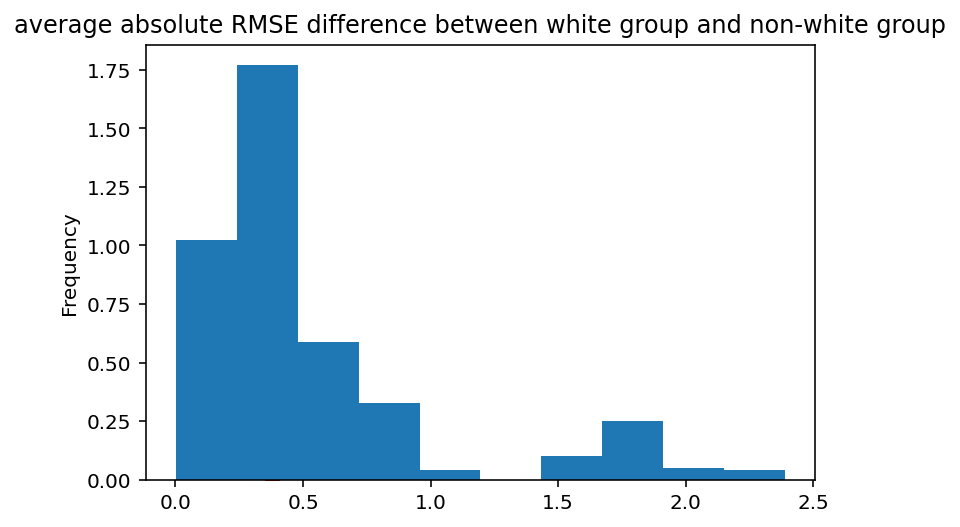

In [295]:
title = 'average absolute RMSE difference between white group and non-white group'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(observed, 0, color='red', s=40);

In [296]:
p_value = np.count_nonzero(differences >= observed)/float(500)
print('P Value:', p_value)

P Value: 0.488
